# Intro

Exploratory data analysis (EDA) of calls to Israel's emergency medical services (EMS), Magen David Adom's (MDA), that describe psychiatric cases.

Data:

The data contains details on emergency missions that were coded as psychiatric, from 01/01/2019 to 31/01/2022. It contains  information from both dispatch logs and medical reports made by responding emergency medical techinicians (EMTs). The raw data includes date and time; type of psychiatric emergency, urgency of mission and responding unit level (basic / advanced life support); age and sex. Cases of patient death were also included. The data encompasses both adult (age >= 18) and pediatric cases.  

Defenitions:
1. A mission is defined as an assignment to a responding EMS unit (or units) and not the actual phone call that was made to the dispatch. Often several phone calls are made for the same mission. Furthermore, some missions involve treating several patients (although in the dispatch log it would appear as if only one patient was in need of help).
2. Psychiatric missions are considered one of the following: alcohol, drug or medication overdose; suicidal ideation or attempt; hanging (considered a distinct category); a restless, anxious or psychotic patient   

The aims of this analysis are as follows:
1. Gain experiance in EDA, as well as in Python, GitHub and PyCharm.
2. Explore the data according to common practices to idnetify patterns.
3. Clean and process the data according to common practices for future model building. 
3. Visualize the data and generate reports for presentation. 

As this is my first attempt in EDA I will prefer manual implementation over prepared package (this will be the only time).

My guidelines for proper analysis were obtained from:
1. https://python.plainenglish.io/begin-at-the-beginning-a-quick-guide-to-eda-packages-7a7d65d0a499
2. https://medium.com/analytics-vidhya/how-to-summarize-data-with-pandas-2c9edffafbaf#3677
3. https://blog.devgenius.io/my-3-favourite-eda-packages-in-python-d6935ad8af7c
4. https://medium.com/analytics-vidhya/pandas-profiling-5ecd0b977ecd

# Imports

In [1]:
import pandas as pd
import constants as cnts
import matplotlib.pyplot as plt

# Load data

In [50]:
%%time
data_path = cnts.raw_mda_psych_data_path
df = pd.read_excel(data_path)
df_ped = df[df['age'] < 18]
df_ade = df[df['age'] >= 18]
df.head()

CPU times: total: 25.7 s
Wall time: 25.7 s


,date,doy,wave,time,urgency,vehicle,medical.team.death,medical.team.restless.patient,medical.team.psychiatric.disturbance,medical.team.psychosis,...,medical.team.anxiety,medical.team.suicidal.ideations,medical.team.overdose.alcohol,medical.team.overdose.drug,medical.team.overdose.medication,medical.team.hanging,age,sex.male,sex.female,sex.other
0,2019-01-01,1,pre-covid,19:00:00,urgent - bls,bls,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1,0,0
1,2019-01-01,1,pre-covid,17:00:00,urgent - bls,bls,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,49.0,1,0,0
2,2019-01-01,1,pre-covid,03:00:00,urgent - bls,bls,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,21.1,0,1,0
3,2019-01-01,1,pre-covid,00:00:00,urgent - bls,bls,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,33.9,1,0,0
4,2019-01-01,1,pre-covid,19:00:00,urgent - bls,bls,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,38.4,1,0,0


# Overview

In [27]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196053 entries, 0 to 196052
Data columns (total 21 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   date                                  196053 non-null  datetime64[ns]
 1   doy                                   196053 non-null  int64         
 2   wave                                  196053 non-null  object        
 3   time                                  196053 non-null  object        
 4   urgency                               196053 non-null  object        
 5   vehicle                               196053 non-null  object        
 6   medical.team.death                    54655 non-null   float64       
 7   medical.team.restless.patient         7748 non-null    float64       
 8   medical.team.psychiatric.disturbance  18476 non-null   float64       
 9   medical.team.psychosis                6980 non-null    floa

,doy,medical.team.death,medical.team.restless.patient,medical.team.psychiatric.disturbance,medical.team.psychosis,medical.team.suicidal.attempt,medical.team.anxiety,medical.team.suicidal.ideations,medical.team.overdose.alcohol,medical.team.overdose.drug,medical.team.overdose.medication,medical.team.hanging,age,sex.male,sex.female,sex.other
count,196053.000000,54655.0,7748.0,18476.0,6980.0,12082.0,42504.0,7114.0,36403.0,9337.0,13330.0,592.0,184481.000000,196053.000000,196053.000000,196053.000000
mean,685.736189,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,49.777424,0.543496,0.450062,0.006442
std,379.376128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.700910,0.498106,0.497501,0.080004
min,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,0.000000,0.000000
25%,360.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,28.100000,0.000000,0.000000,0.000000
50%,705.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,46.100000,1.000000,0.000000,0.000000
75%,1017.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,70.200000,1.000000,1.000000,0.000000
max,1308.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,115.200000,1.000000,1.000000,1.000000


# Univariate analysis and visualization
## Age (pediatric cases)

In [9]:
df_ped['age'].describe()

count    11045.000000
mean        14.263561
std          3.793753
min          1.000000
25%         13.600000
50%         15.300000
75%         16.800000
max         17.900000
Name: age, dtype: float64

([<matplotlib.axis.XTick at 0x284242b7fd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

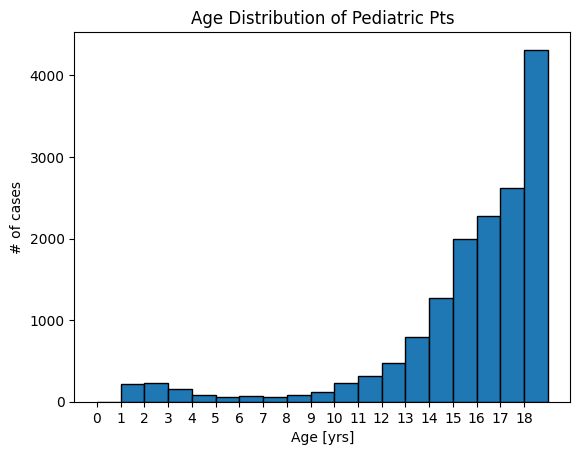

In [11]:
plt.hist(df['age'], bins=19, range=(0,19), align='mid', edgecolor='black')
plt.xlabel('Age [yrs]')
plt.ylabel('# of cases')
plt.title('Age Distribution of Pediatric Pts')
plt.xticks(range(0,19,1))

In [12]:
## Age (adult cases)

In [13]:
df_adu = df[df['age'] >= 18]
df_adu['age'].describe()

count    173436.000000
mean         52.039069
std          23.720010
min          18.000000
25%          31.100000
50%          48.100000
75%          72.100000
max         115.200000
Name: age, dtype: float64

([<matplotlib.axis.XTick at 0x28438a8f280>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

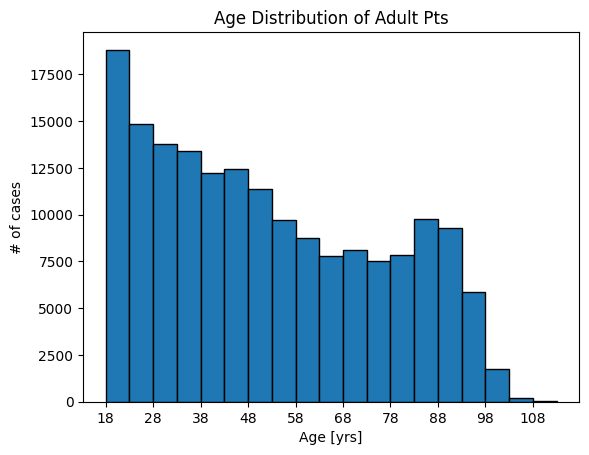

In [33]:
plt.hist(df['age'], bins=range(18,118,5), log=False, align='mid', edgecolor='black')
plt.xlabel('Age [yrs]')
plt.ylabel('# of cases')
plt.title('Age Distribution of Adult Pts')
plt.xticks(range(18,118,10))

## Responding vehicle

count     196053
unique         2
top          bls
freq       99161
Name: vehicle, dtype: object 

bls    99161
als    96892
Name: vehicle, dtype: int64


<AxesSubplot:>

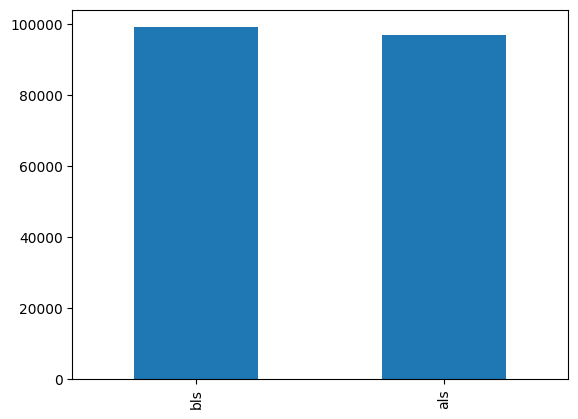

In [28]:
print(df['vehicle'].describe(), '\n')
print(df['vehicle'].value_counts())
df['vehicle'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

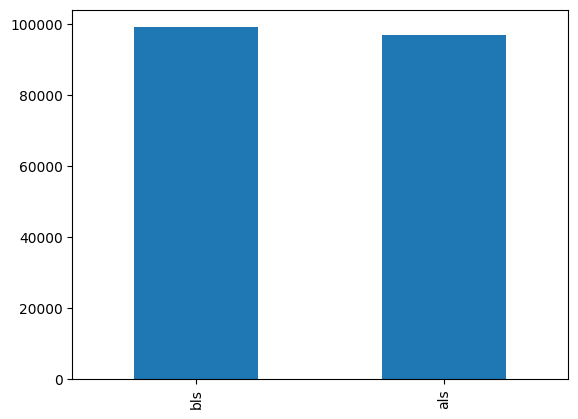

## Urgency of call

count     196053
unique         3
top          als
freq       97204
Name: urgency, dtype: object 

als               97204
urgent - bls      79829
non-urgent bls    19020
Name: urgency, dtype: int64


<AxesSubplot:>

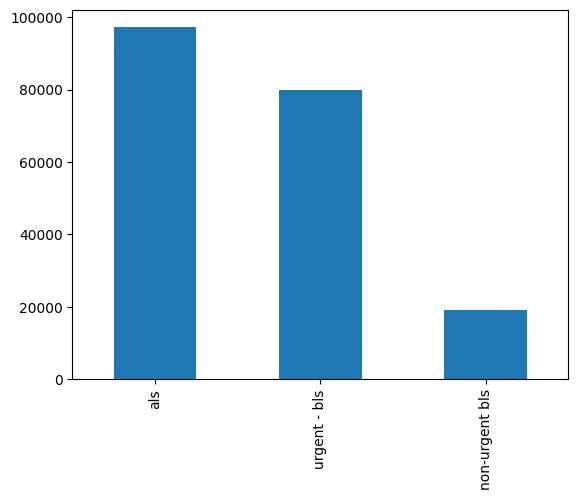

In [30]:
print(df['urgency'].describe(), '\n')
print(df['urgency'].value_counts())
df['urgency'].value_counts().plot(kind = 'bar')

## Wave

count        196053
unique           12
top       pre-covid
freq          61334
Name: wave, dtype: object 

pre-covid    61334
b3-4         20219
w2           17274
w3           16783
w5           15233
w4           13999
w6           13318
b4-5         12294
b1-2          8353
b5-6          6942
w1            6293
b2-3          4011
Name: wave, dtype: int64


<AxesSubplot:>

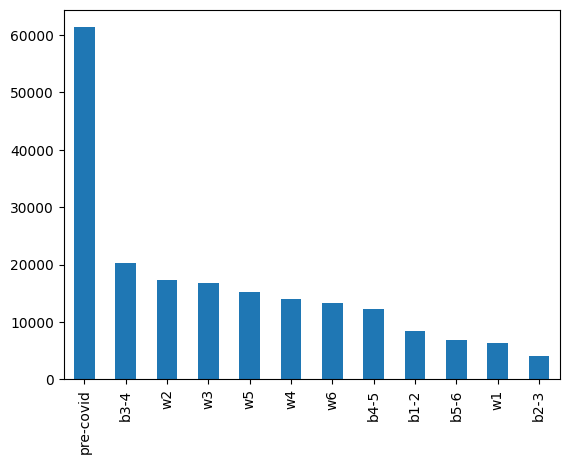

In [31]:
print(df['wave'].describe(), '\n')
print(df['wave'].value_counts())
df['wave'].value_counts().plot(kind = 'bar')

## Cases

medical.team.death                      54655.0
medical.team.restless.patient            7748.0
medical.team.psychiatric.disturbance    18476.0
medical.team.psychosis                   6980.0
medical.team.suicidal.attempt           12082.0
medical.team.anxiety                    42504.0
medical.team.suicidal.ideations          7114.0
medical.team.overdose.alcohol           36403.0
medical.team.overdose.drug               9337.0
medical.team.overdose.medication        13330.0
dtype: float64


<AxesSubplot:>

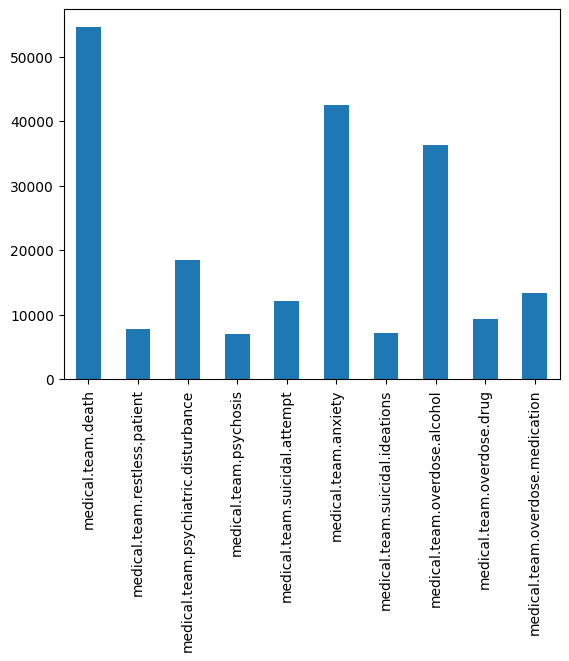

In [56]:
print(df.iloc[:,range(6,16,1)].sum())
df.iloc[:,range(6,16,1)].sum().plot(kind='bar')

## Sex

sex.male      106554
sex.female     88236
sex.other       1263
dtype: int64


<AxesSubplot:>

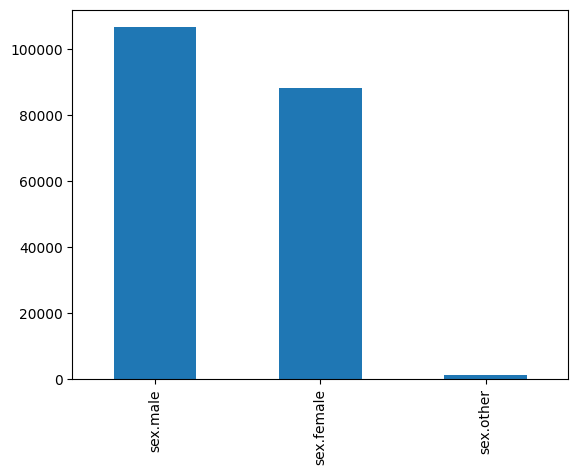

In [55]:
print(df.iloc[:,range(18,21,1)].sum())
df.iloc[:,range(18,21,1)].sum().plot(kind='bar')

## Missions with deaths

In [64]:
df_dead = df[df['medical.team.death'] == 1]
df_dead

,date,doy,wave,time,urgency,vehicle,medical.team.death,medical.team.restless.patient,medical.team.psychiatric.disturbance,medical.team.psychosis,...,medical.team.anxiety,medical.team.suicidal.ideations,medical.team.overdose.alcohol,medical.team.overdose.drug,medical.team.overdose.medication,medical.team.hanging,age,sex.male,sex.female,sex.other
93,2019-01-01,1,pre-covid,09:00:00,als,als,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,80.0,0,1,0
97,2019-01-01,1,pre-covid,05:00:00,als,als,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,94.1,0,1,0
98,2019-01-01,1,pre-covid,10:00:00,als,als,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.0,0,1,0
100,2019-01-01,1,pre-covid,15:00:00,als,als,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,84.4,0,1,0
101,2019-01-01,1,pre-covid,13:00:00,als,als,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,58.1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196020,2022-07-31,1308,w6,13:00:00,als,als,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,93.4,0,1,0
196024,2022-07-31,1308,w6,21:00:00,als,als,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,84.1,0,1,0
196026,2022-07-31,1308,w6,17:00:00,als,als,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.8,1,0,0
196045,2022-07-31,1308,w6,08:00:00,als,als,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,91.1,1,0,0


Text(0.5, 1.0, 'Age distribution in cases of death')

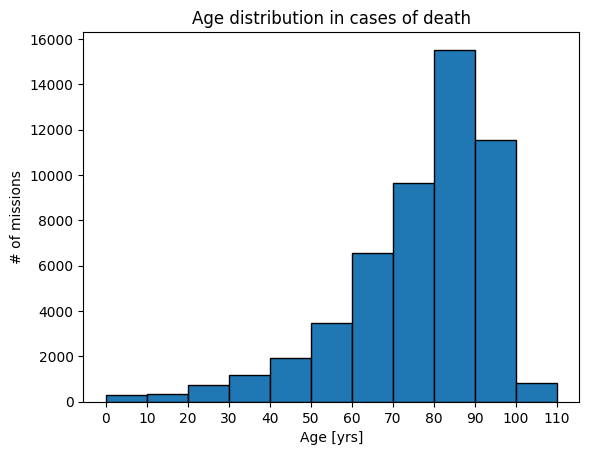

In [72]:
df_dead['age'].plot(kind = 'hist', bins=range(0,120,10), edgecolor='black')
plt.xticks(range(0,120,10))
plt.xlabel("Age [yrs]")
plt.ylabel("# of missions")
plt.title("Age distribution in cases of death")

,date,doy,wave,time,urgency,vehicle,medical.team.death,medical.team.restless.patient,medical.team.psychiatric.disturbance,medical.team.psychosis,...,medical.team.anxiety,medical.team.suicidal.ideations,medical.team.overdose.alcohol,medical.team.overdose.drug,medical.team.overdose.medication,medical.team.hanging,age,sex.male,sex.female,sex.other
